卷积本是分析数学中的一种运算，在深度学习中使用的卷积运算通常是离散的。**作为卷积神经网络中最基础的组成部分，卷积的本质是用卷积核的参数来提取数据的特征，通过矩阵点乘运算与求和运算来得到结果。**

如图所示为一个基本二维卷积的运算过程，公式为y=ωx+b。这里的特征图（x）大小为1×5×5，即输入通道数为1，卷积核（ω）的大小为3×3，偏置（b）为1，为保证输出维度和输入特征维度一致，还需要有填充（padding），这里使用zero-padding，即用0来填充。

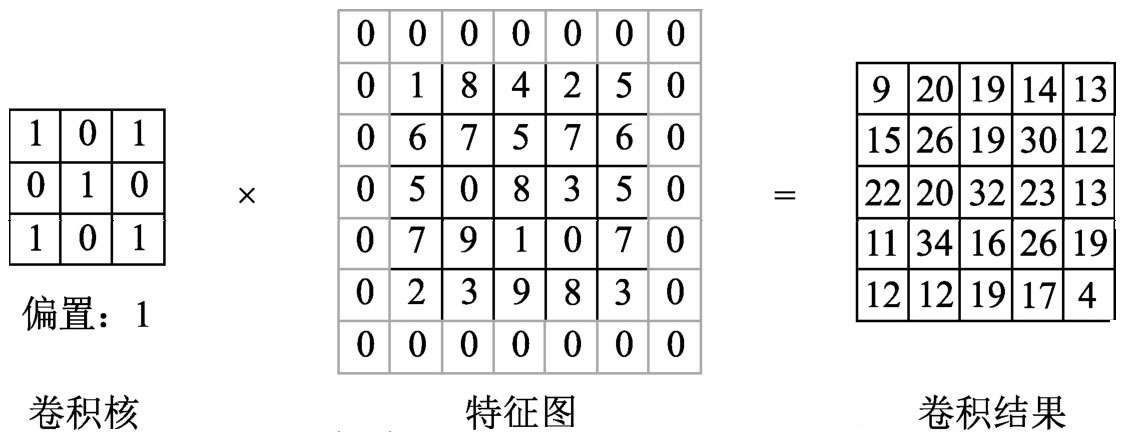

卷积核参数与对应位置像素逐位相乘后累加作为一次计算结果。以图3.3左上角为例，其计算过程为1×0+0×0+1×0+0×0+1×1+0×8+1×0+0×6+1×7+1=9，然后在特征图上进行滑动，即可得到所有的计算结果。

In [1]:
import torch
from torch import nn

In [2]:
#使用torch.nn中的Conv2d()搭建卷积层
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, stride=1, padding=1, dilation=1, groups=1, bias=True)

#查看卷积核的基本信息，本质上是一个Module
conv

Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

In [3]:
#通过.weight与.bias查看卷积核的权重与偏置
conv.weight.shape

torch.Size([1, 1, 3, 3])

In [4]:
#通过.weight与.bias查看卷积核的权重与偏置
conv.bias.shape

torch.Size([1])

In [5]:
#输入特征图，需要注意特征必须是四维，第一维作为batch数，即使是1也要保留
input = torch.ones(1, 1, 5, 5)
output = conv(input)
input, output

(tensor([[[[1., 1., 1., 1., 1.],
           [1., 1., 1., 1., 1.],
           [1., 1., 1., 1., 1.],
           [1., 1., 1., 1., 1.],
           [1., 1., 1., 1., 1.]]]]),
 tensor([[[[ 0.4118, -0.0590, -0.0590, -0.0590, -0.4594],
           [ 0.5597, -0.2306, -0.2306, -0.2306, -0.4592],
           [ 0.5597, -0.2306, -0.2306, -0.2306, -0.4592],
           [ 0.5597, -0.2306, -0.2306, -0.2306, -0.4592],
           [ 0.4417, -0.1158, -0.1158, -0.1158, -0.1005]]]],
        grad_fn=<ThnnConv2DBackward0>))

In [6]:
#当前配置的卷积核可以使输入和输出的大小一致
input.shape, output.shape

(torch.Size([1, 1, 5, 5]), torch.Size([1, 1, 5, 5]))

### 对于torch.nn.Conv2d()来说，传入的参数含义如下：
①in_channels：输入特征图的通道数，如果是RGB图像，则通道数为3。卷积中的特征图通道数一般是2的整数次幂。

②out_channels：输出特征图的通道数。

③kernel_size：卷积核的尺寸，常见的有1、3、5、7。

④stride：步长，即卷积核在特征图上滑动的步长，一般为1。如果大于1，则输出特征图的尺寸会小于输入特征图的尺寸。

⑤padding：填充，常见的有零填充、边缘填充等，PyTorch默认为零填充。

⑥dilation：空洞卷积，当大于1时可以增大感受野的同时保持特征图的尺寸（后面会细讲），默认为1。

⑦groups：可实现组卷积，即在卷积操作时不是逐点卷积，而是将输入通道分为多个组，稀疏连接达到降低计算量的目的（后续会细讲），默认为1。

⑧bias：是否需要偏置，默认为True。

实际使用中，特征图的维度通常都不是1，假设输入特征图维度为m×win×hin，输出特征图维度为n×wout×hout，则卷积核的维度为n×m×k×k，在此产生的乘法操作次数为n×wout×hout×m×k×k。